In [2]:
# Netflix Data Analysis Project
# Step 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# Step 2. Load Dataset

df = pd.read_csv("netflix_titles.csv")
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print(df.head())


Dataset loaded successfully.
Shape: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV

In [4]:
# Step 3. Basic Info

print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
show_id            0
type               0
title              0
dire

In [19]:
# 🔹 1. Remove duplicate rows
df.drop_duplicates(inplace=True)


In [21]:
# 🔹 2. Handle missing values
# Fill missing 'director', 'cast', and 'duration' with 'Unknown'
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Unknown',
    'duration': 'Unknown'
}, inplace=True)

In [24]:
# 🔹 3. Clean 'date_added' column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [48]:
# 🔹 6. Optional: Standardize categorical values
df['type'] = df['type'].str.strip().str.title()
df['rating'] = df['rating'].replace({'UR': 'Unrated', 'NR': 'Unrated', 'Not Rated': 'Unrated'})



In [49]:
# 🔹 7. Remove outliers in 'duration_int' if needed
df = df[df['duration_int'].isnull() | (df['duration_int'] < 1000)]

In [50]:

print("✅ Cleaned Netflix Dataset:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSample of cleaned data:")
print(df.head())

✅ Cleaned Netflix Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8709 non-null   datetime64[ns]
 7   release_year   8807 non-null   int64         
 8   rating         8807 non-null   object        
 9   duration       8807 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  year_added     8709 non-null   float64       
 13  month_added    8709 non-null   float64       
 14  duration_type  8807 non-null   object        

In [51]:
# Fill missing values safely
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'duration': 'Unknown'}, inplace=True)

# Convert date and extract year/month
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month



C:\Users\anubh\AppData\Local\Temp\ipykernel_12224\2455496677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='cool')


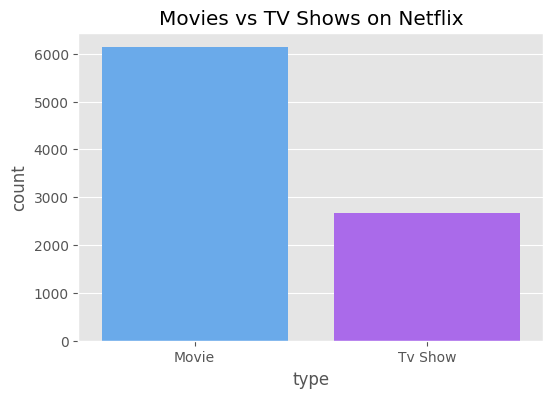

type
Movie      69.615079
Tv Show    30.384921
Name: proportion, dtype: float64


In [52]:
# Step 5. Basic EDA (Exploratory Data Analysis)

# 1. Ratio of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='cool')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

print(df['type'].value_counts(normalize=True)*100)

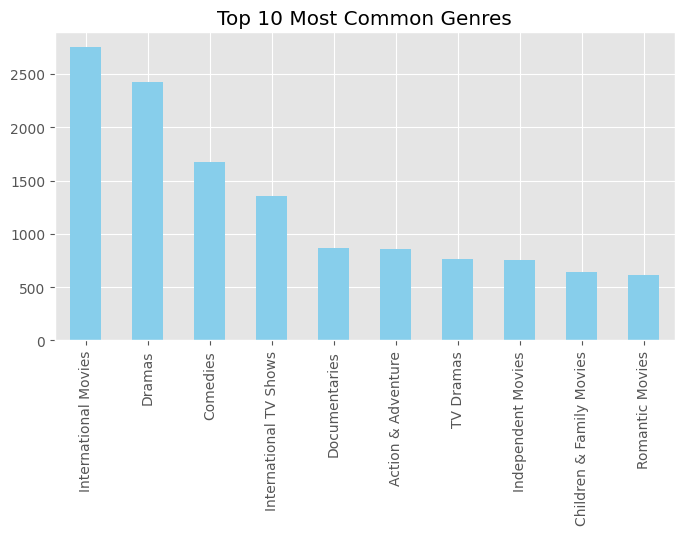

In [53]:
# 2. Top 10 Genres
from itertools import chain

genres = df['listed_in'].dropna().str.split(', ')
all_genres = list(chain.from_iterable(genres))
genre_count = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(8,4))
genre_count.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Genres")
plt.show()

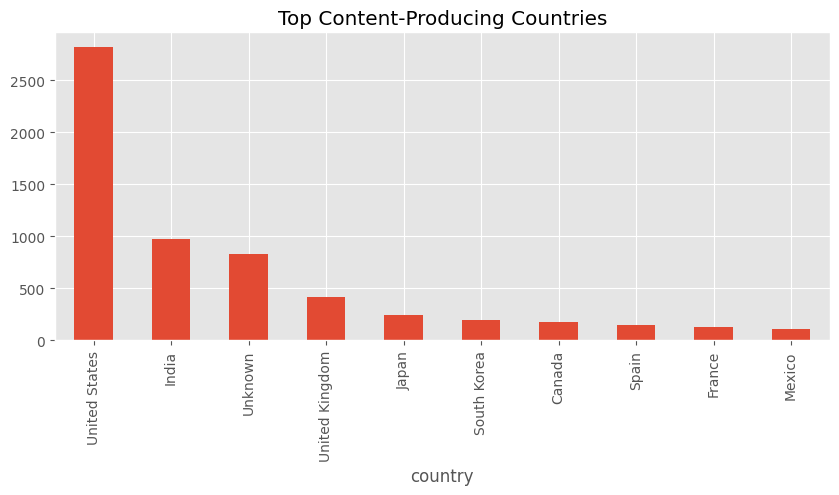

In [54]:
# 3. Top Content-Producing Countries
plt.figure(figsize=(10,4))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top Content-Producing Countries")
plt.show()


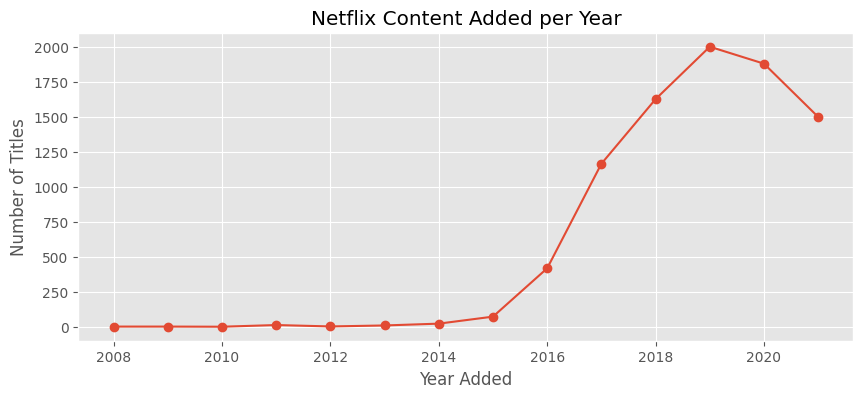

In [55]:
# 4. Trend of Content Added per Year
plt.figure(figsize=(10,4))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

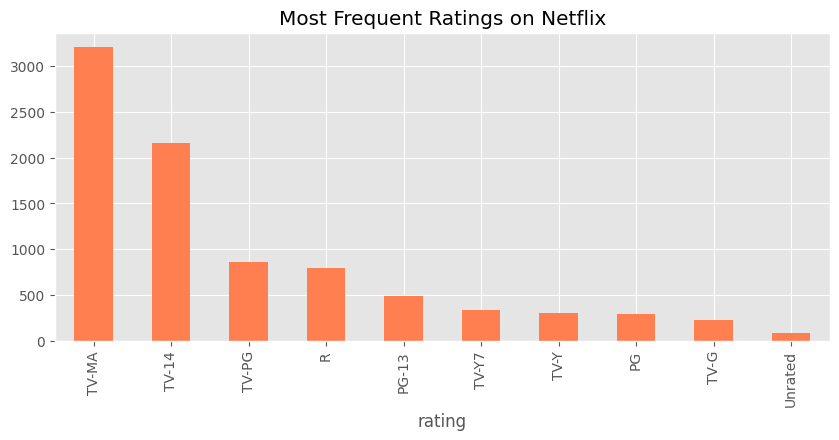

In [56]:
# 5. Ratings Distribution
plt.figure(figsize=(10,4))
df['rating'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Most Frequent Ratings on Netflix")
plt.show()

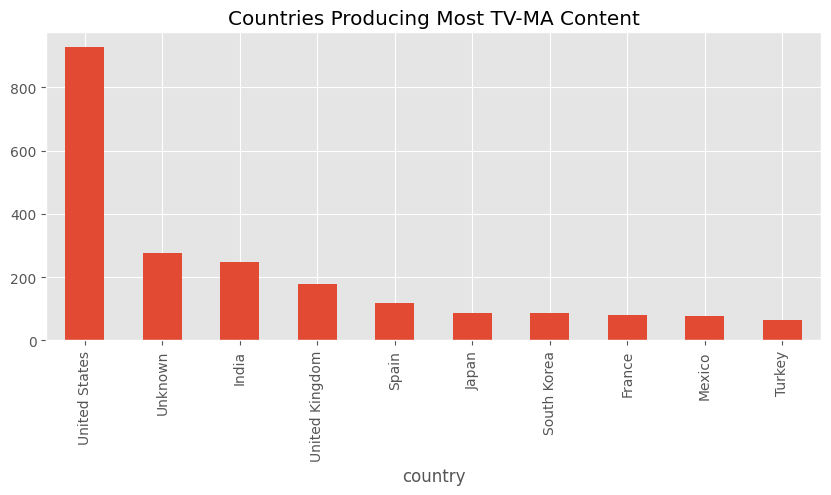

In [57]:
# 6. Countries Producing Most Mature (TV-MA) Content
mature = df[df['rating'] == 'TV-MA']
plt.figure(figsize=(10,4))
mature['country'].value_counts().head(10).plot(kind='bar')
plt.title("Countries Producing Most TV-MA Content")
plt.show()

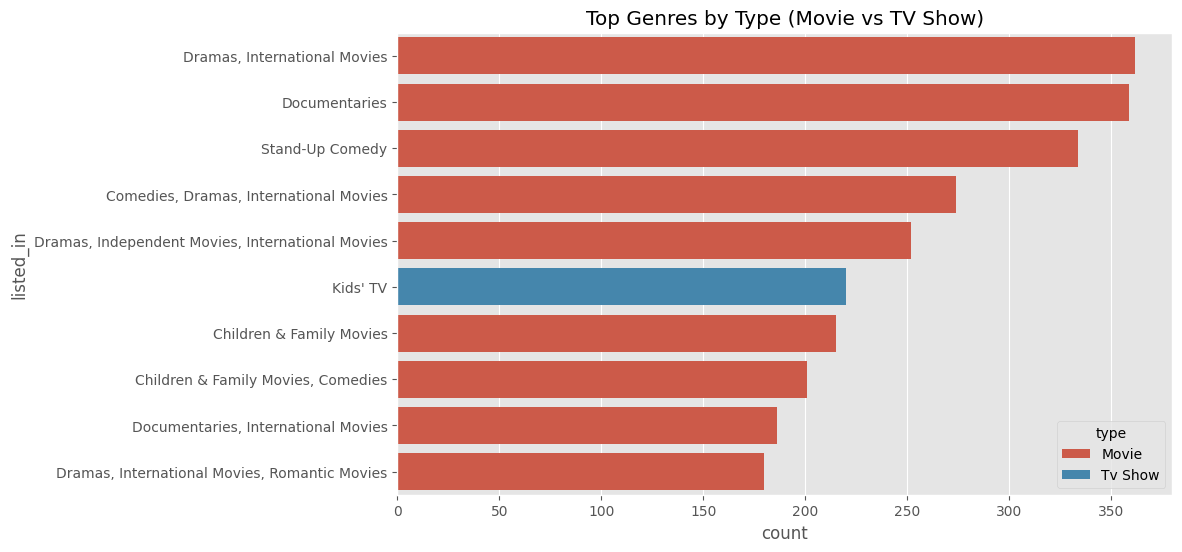

In [58]:
# 7. Popular Genres in Movies vs TV Shows
plt.figure(figsize=(10,6))
sns.countplot(y='listed_in', hue='type', data=df, order=df['listed_in'].value_counts().index[:10])
plt.title("Top Genres by Type (Movie vs TV Show)")
plt.show()


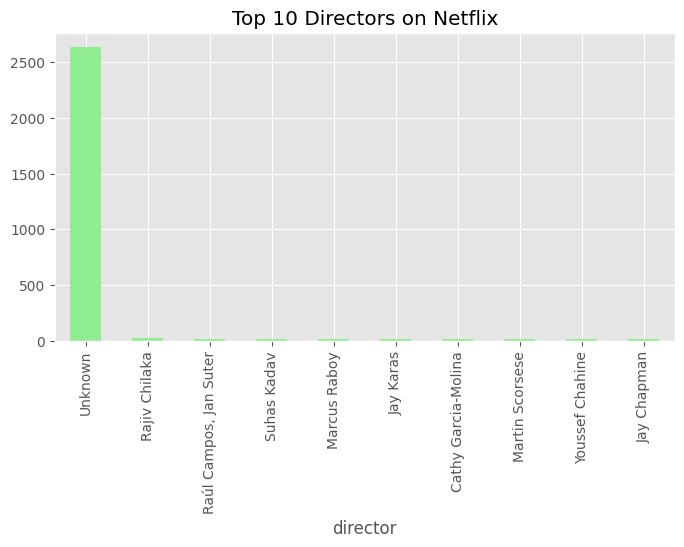

In [59]:
# 8. Top 10 Directors
plt.figure(figsize=(8,4))
df['director'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Directors on Netflix")
plt.show()

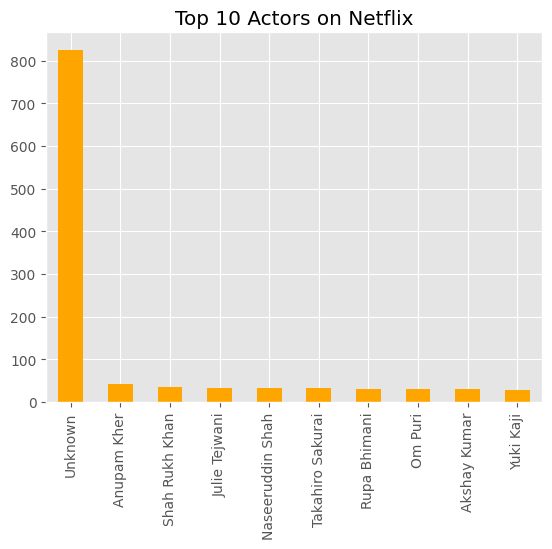

In [60]:
# 9. Top 10 Actors
actors = df['cast'].dropna().str.split(', ')
actors_flat = list(chain.from_iterable(actors))
pd.Series(actors_flat).value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Actors on Netflix")
plt.show()

In [61]:
# 10. Average Duration of Movies
movies = df[df['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.replace(' min','', regex=False)
movies['duration_min'] = pd.to_numeric(movies['duration_min'], errors='coerce')

avg_duration = movies['duration_min'].mean()
print(f"Average Movie Duration: {avg_duration:.2f} minutes")


Average Movie Duration: 99.58 minutes


C:\Users\anubh\AppData\Local\Temp\ipykernel_12224\2717512033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.replace(' min','', regex=False)
C:\Users\anubh\AppData\Local\Temp\ipykernel_12224\2717512033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = pd.to_numeric(movies['duration_min'], errors='coerce')


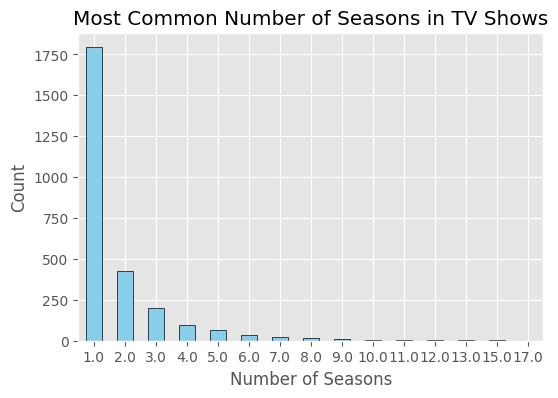

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter TV Shows only
tv_shows = df[df['type'].str.strip().str.lower() == 'tv show'].copy()

# Drop unknown or invalid durations
tv_shows = tv_shows[tv_shows['duration'].str.contains('Season', na=False)]

# Extract numeric part (number of seasons)
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

# Check if data exists before plotting
if tv_shows['seasons'].notnull().sum() == 0:
    print("⚠️ No valid season data found in your dataset to plot.")
else:
    plt.figure(figsize=(6,4))
    tv_shows['seasons'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Most Common Number of Seasons in TV Shows")
    plt.xlabel("Number of Seasons")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()



In [63]:
print(tv_shows['duration'].value_counts().head())


duration
1 Season     1793
2 Seasons     425
3 Seasons     199
4 Seasons      95
5 Seasons      65
Name: count, dtype: int64


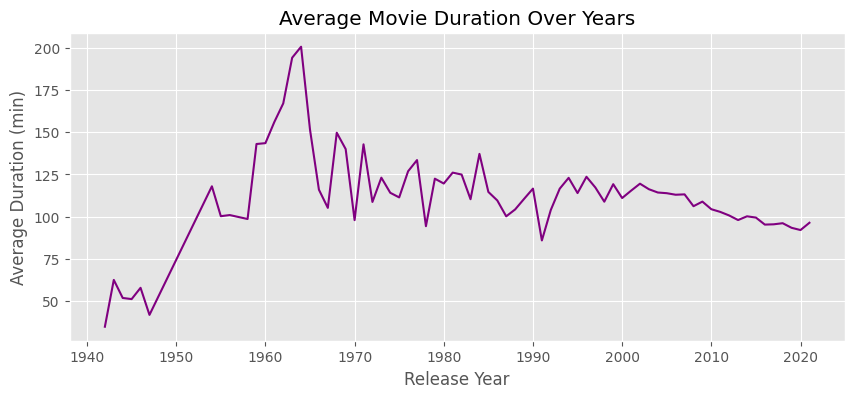

In [64]:
# 12. Movie Duration Trend by Year
movies.groupby('release_year')['duration_min'].mean().plot(figsize=(10,4), color='purple')
plt.title("Average Movie Duration Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (min)")
plt.show()

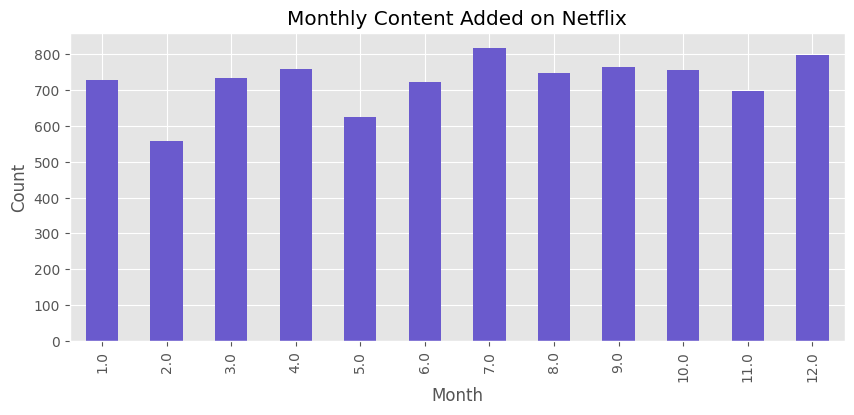

In [65]:
# 13. Monthly Content Addition
df['month_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), color='slateblue')
plt.title("Monthly Content Added on Netflix")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

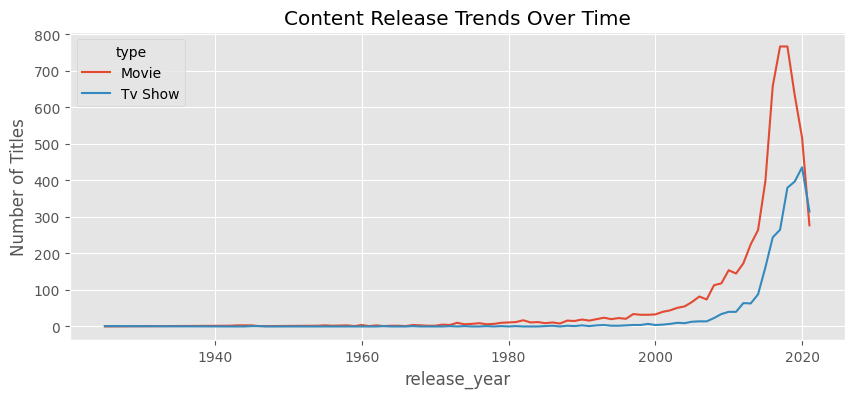

In [66]:
# 14. Genre Distribution Over Time
year_genre = df.groupby(['release_year','type']).size().unstack(fill_value=0)
year_genre.plot(figsize=(10,4))
plt.title("Content Release Trends Over Time")
plt.ylabel("Number of Titles")
plt.show()

In [67]:
# 15. Countries Producing the Most Content in Each Genre
top_country_genre = df.groupby(['country','listed_in']).size().sort_values(ascending=False).head(10)
print(top_country_genre)


country        listed_in                                       
United States  Documentaries                                       249
               Stand-Up Comedy                                     209
India          Comedies, Dramas, International Movies              120
               Dramas, International Movies                        118
               Dramas, Independent Movies, International Movies    108
United States  Children & Family Movies, Comedies                   90
               Dramas                                               88
               Comedies                                             84
               Children & Family Movies                             80
               Kids' TV                                             77
dtype: int64


Object `Shows` not found.


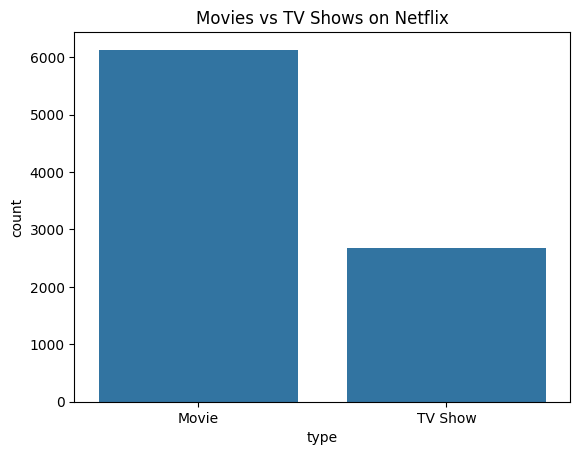

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [42]:
️1- What’s the ratio of Movies vs TV Shows?
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows on Netflix')
plt.show()

df['type'].value_counts(normalize=True) * 100


In [43]:
# 2- Which are the most popular genres globally?
genres = df['listed_in'].dropna().str.split(', ')
from itertools import chain
pd.Series(chain.from_iterable(genres)).value_counts().head(10)


International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

Object `content` not found.


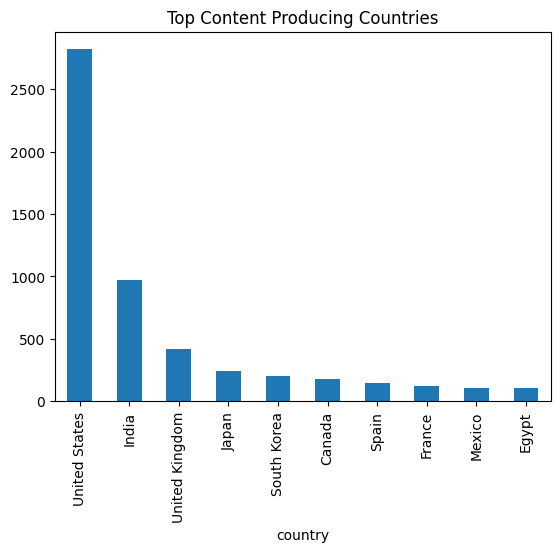

In [44]:
️3-  Which countries produce the most content?
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar')
plt.title("Top Content Producing Countries")
plt.show()


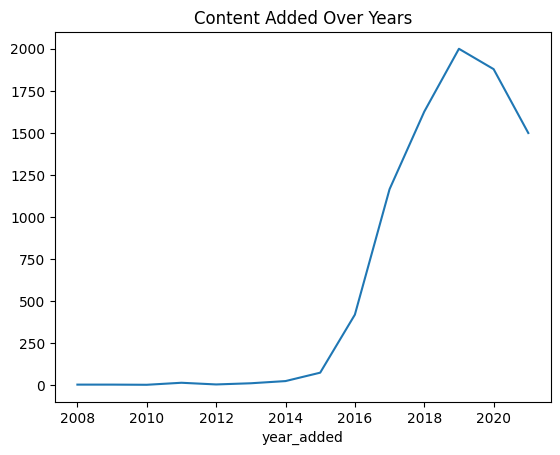

In [27]:
#4- How has Netflix’s content addition trend changed over time?
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over Years")
plt.show()


Object `rating` not found.


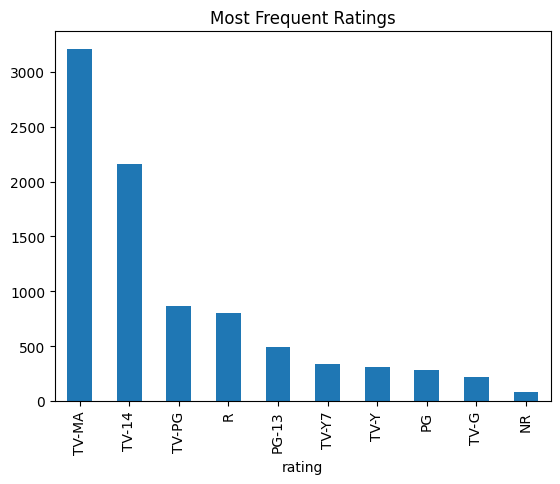

In [45]:
️5-  What is the most common content rating?
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Most Frequent Ratings")
plt.show()


In [46]:
️6-  Which countries produce the most mature (TV-MA) content?
mature = df[df['rating'] == 'TV-MA']
mature['country'].value_counts().head(5)


Object `content` not found.


country
United States     928
India             248
United Kingdom    177
Spain             119
Japan              87
Name: count, dtype: int64

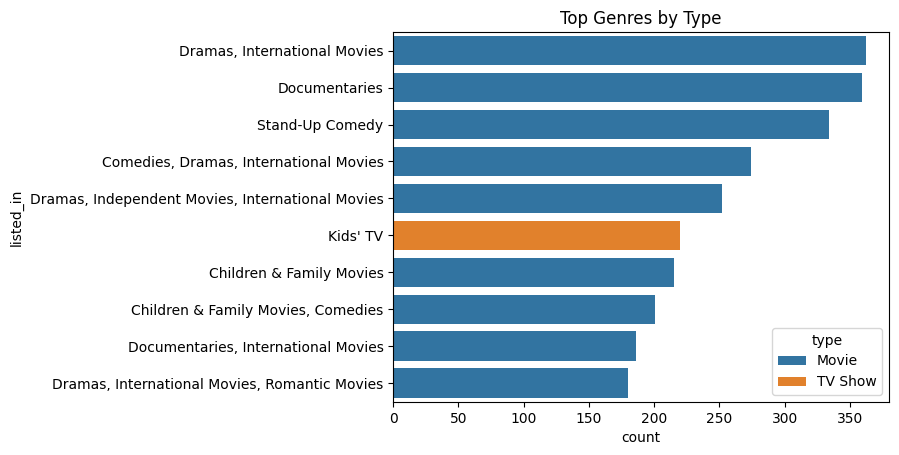

In [32]:
 #7-  Which genres dominate Movies vs TV Shows?
sns.countplot(y='listed_in', hue='type', data=df, order=df['listed_in'].value_counts().index[:10])
plt.title("Top Genres by Type")
plt.show()


In [33]:
#️8-  Who are the top 10 directors?
df['director'].value_counts().head(10)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [47]:
️9-  Which actors appear most frequently?
actors = df['cast'].dropna().str.split(', ')
actors_flat = [a for sub in actors for a in sub]
pd.Series(actors_flat).value_counts().head(10)


Object `frequently` not found.


Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64

In [48]:
️10-  What’s the most common number of TV show seasons?
tv_shows = df[df['type'] == 'TV Show']
tv_shows['duration'].value_counts().head(5)


Object `seasons` not found.


duration
1 Season     1793
2 Seasons     425
3 Seasons     199
4 Seasons      95
5 Seasons      65
Name: count, dtype: int64

In [36]:
#️11- Which countries dominate each genre?
df.groupby(['country','listed_in']).size().sort_values(ascending=False).head(10)


country        listed_in                                       
United States  Documentaries                                       249
               Stand-Up Comedy                                     209
India          Comedies, Dramas, International Movies              120
               Dramas, International Movies                        118
               Dramas, Independent Movies, International Movies    108
United States  Children & Family Movies, Comedies                   90
               Dramas                                               88
               Comedies                                             84
               Children & Family Movies                             80
               Kids' TV                                             77
dtype: int64

In [5]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        